# Stock Price Prediction using GRU
In this notebook we are demonstrating how to build a GRU model to use to predict daily stock prices using historical stock data of JP Morgan Chase (JPM).

## Importing required libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

## Loading and preparing our Dataset

In [ ]:
# Load and prepare the dataset
df = pd.read_csv('/content/JPStockPredict.csv')

# Convert 'date' column to timezone-aware datetime in UTC
df['date'] = pd.to_datetime(df['date'], utc=True)

# Sort dataset chronologically and reset index
df.sort_values('date', inplace=True)
df.reset_index(drop=True, inplace=True)

# Extract and normalize 'close' prices
close_prices = df['close'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_close = scaler.fit_transform(close_prices)

## Sequence Prep

In [ ]:
def create_sequences(data, look_back):
    X, y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:i + look_back])
        y.append(data[i + look_back])
    return np.array(X), np.array(y)

## Test-Train Split

In [ ]:
look_back = 60
X_all, y_all = create_sequences(scaled_close, look_back)

# Find the index where the date is '2020-12-31'
split_date = pd.Timestamp('2020-12-31', tz='UTC')
split_index = df[df['date'] <= split_date].shape[0] - look_back

X_train = X_all[:split_index]
y_train = y_all[:split_index]
X_test = X_all[split_index:]
y_test = y_all[split_index:]

## Building and Training the GRU model

In [ ]:
# Enhanced GRU model with deeper architecture and dropout regularization
gru_model = Sequential()

# First GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True, input_shape=(look_back, 1)))
gru_model.add(Dropout(0.2))

# Second GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Third GRU layer with dropout
gru_model.add(GRU(50, return_sequences=True))
gru_model.add(Dropout(0.2))

# Fourth GRU layer with dropout
gru_model.add(GRU(50))
gru_model.add(Dropout(0.2))

# Output layer
gru_model.add(Dense(1))

# Compile the model
gru_model.compile(optimizer='adam', loss='mean_squared_error')

# Display model summary
gru_model.summary()


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ gru_10 (GRU)                    │ (None, 60, 50)         │         7,950 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_11 (GRU)                    │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_12 (GRU)                    │ (None, 60, 50)         │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 60, 50)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru_13 (GRU)                    │ (None, 50)             │        15,300 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 53,901 (210.55 KB)

 Trainable params: 53,901 (210.55 KB)

 Non-trainable params: 0 (0.00 B)

## Predicting and Evaluating the GRU model

In [ ]:
gru_model.compile(optimizer='adam', loss='mean_squared_error')
gru_model.fit(X_train, y_train, epochs=10, batch_size=32)

Epoch 1/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 60s 157ms/step - loss: 0.0022
Epoch 2/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 154ms/step - loss: 2.8239e-04
Epoch 3/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 154ms/step - loss: 2.5087e-04
Epoch 4/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 83s 156ms/step - loss: 2.1843e-04
Epoch 5/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - loss: 2.0513e-04
Epoch 6/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 153ms/step - loss: 2.0693e-04
Epoch 7/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 48s 150ms/step - loss: 1.8155e-04
Epoch 8/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 50s 157ms/step - loss: 1.7051e-04
Epoch 9/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 82s 157ms/step - loss: 1.7078e-04
Epoch 10/10
320/320 ━━━━━━━━━━━━━━━━━━━━ 81s 153ms/step - loss: 1.5398e-04


In [ ]:
predictions = gru_model.predict(X_test)

predicted_prices = scaler.inverse_transform(predictions)
actual_prices = scaler.inverse_transform(y_test.reshape(-1, 1))

33/33 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step


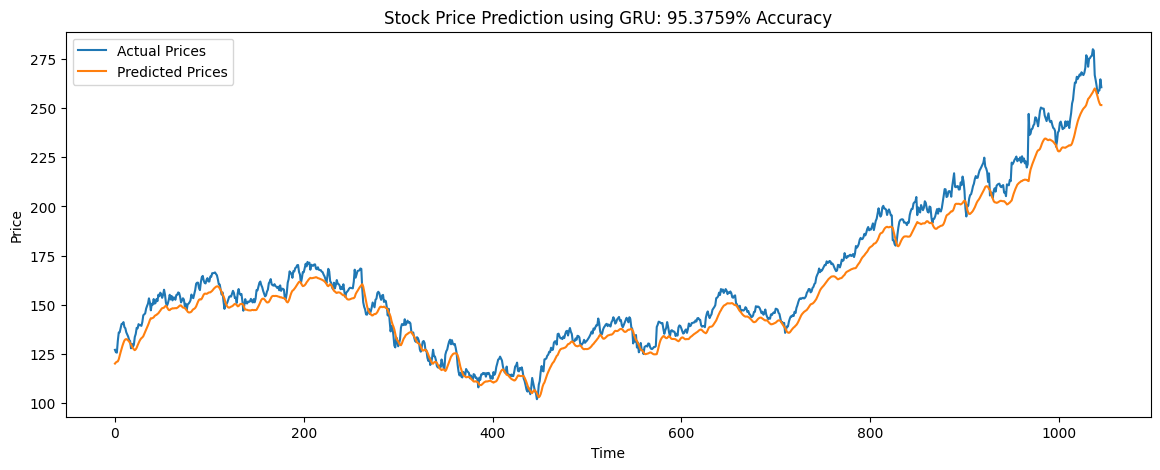

In [ ]:
r2 = r2_score(actual_prices, predicted_prices)
plt.figure(figsize=(14, 5))
plt.plot(actual_prices, label='Actual Prices')
plt.plot(predicted_prices, label='Predicted Prices')
plt.title(f'Stock Price Prediction using GRU: {r2 * 100:.4f}% Accuracy')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()